#### Contents
Security implications

Regional segmentation

Regional spending

Exlusion of low order customers

Customer profiles

Aggregation of customer profiles

Regional comparisons

Department comparisons

Export charts

Export data

In [37]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/kaitlinkendrick/Documents/Data Analysis/Instacart Basket Analysis'

In [3]:
# import dataframe
ords_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merged_data.pkl'))

In [4]:
# import department dictionary
dept_dict = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

### Security implications

In [5]:
# address any PII in the data
ords_merge.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,spender_type,order_frequency,frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,1960,1960,3160996,138,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,1969,1969,2254091,138,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,1968,1968,505689,138,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


I previously deleted the names from the customer dataset as it was outside of the scope of the analysis. The remaining data doesn't include enough information to identify any customer without further information and should be secure. 

### Regional Segmentation

In [6]:
ords_merge.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_previous_order', 't/f_days_since_previous_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spender_type', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'num_dependents', 'fam_status', 'income'],
      dtype='object')

In [7]:
# create regional segmentation of data, creating a new column 'region' based on existing 'state' column 
region = []
for value in ords_merge['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [8]:
# create region column
ords_merge['region'] = region

In [9]:
ords_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

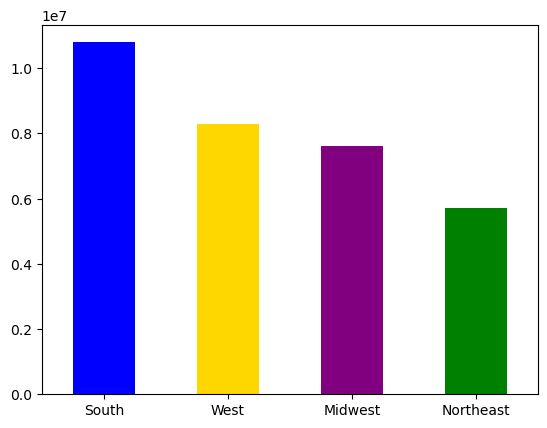

In [52]:
# bar chart of region column
region_bar = ords_merge['region'].value_counts().plot.bar(rot = 0, color = ['blue', 'gold', 'purple', 'green'])

### Regional spending

In [11]:
# check spending habits of regions
spend_crosstab = pd.crosstab(ords_merge['region'], ords_merge['spender_type'], dropna = False)

In [12]:
spend_crosstab

spender_type,High spender,Low spender
region,,
Midwest,2497034,5100291
Northeast,1875170,3847566
South,3549625,7242260
West,2722093,5570820


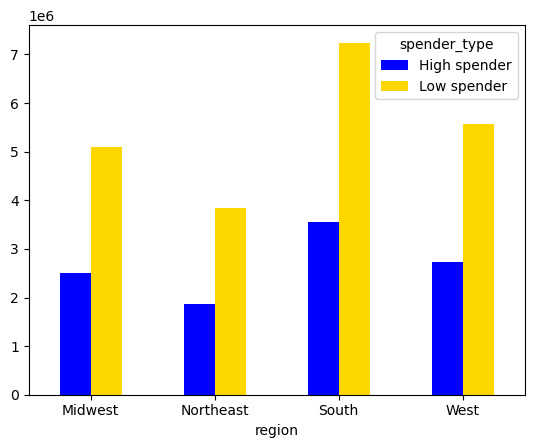

In [13]:
# create bar chart of spend_crosstab
spend_bar = spend_crosstab.plot.bar(rot = 0, color = ['blue', 'gold'])

### Exclusion of low order customers

In [14]:
# create exclusion flag for customers with less than 5 orders
ords_merge.loc[ords_merge['order_frequency'] < 5, 'exclusion_flag'] = 'low order customer'

In [15]:
ords_merge.loc[ords_merge['order_frequency'] >=5, 'exclusion_flag'] = 'high order customer'

In [16]:
ords_merge['exclusion_flag'].value_counts(dropna = False)

high order customer    27811924
low order customer      4592930
NaN                           5
Name: exclusion_flag, dtype: int64

In [17]:
ords_merge.shape

(32404859, 35)

In [18]:
low_order = ords_merge[ords_merge['exclusion_flag'] == 'low order customer']

In [19]:
low_order.shape

(4592930, 35)

In [20]:
high_order = ords_merge[ords_merge['exclusion_flag'] == 'high order customer']

In [21]:
high_order.shape

(27811924, 35)

In [22]:
# export dataframe of only high order customers
high_order.to_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'high_order_customers.pkl'))

### Customer profiles

In [23]:
# check dept_dict
dept_dict

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


customers purchasing from dept 18, with >= 1 dependent = 'New parent'

customers aged <25, w/ no dependents = 'single adult'

customers aged 18-30 = 'young adult'

customers aged 30-65 = 'adult'

customers w/ >=1 dependent, age <=40, and income <=45k = 'single parent'

customers aged 65+ w/ 0 dependents = 'Retired adult'

In [24]:
# create profiling variables based on above categories
ords_merge.loc[(ords_merge['department_id'] == 18) & (ords_merge['num_dependents'] >=1), 'parent_profile'] = 'New Parent'

In [25]:
ords_merge.loc[(ords_merge['age'] <25) & (ords_merge['num_dependents'] ==0), 'parent_profile'] = 'Single Adult'

In [26]:
ords_merge.loc[(ords_merge['age'] >=18) & (ords_merge['age'] <=30), 'age_profile'] = 'Young Adult'

In [27]:
ords_merge.loc[(ords_merge['age'] >30) & (ords_merge['age'] <=65), 'age_profile'] = 'Adult'

In [28]:
ords_merge.loc[(ords_merge['num_dependents'] >=1) & (ords_merge['age'] <=40) & (ords_merge['income'] <=45000), 'parent_profile'] = 'Single Parent'

In [29]:
ords_merge.loc[(ords_merge['num_dependents'] ==0) & (ords_merge['age'] >65), 'age_profile'] = 'Retired Adult'

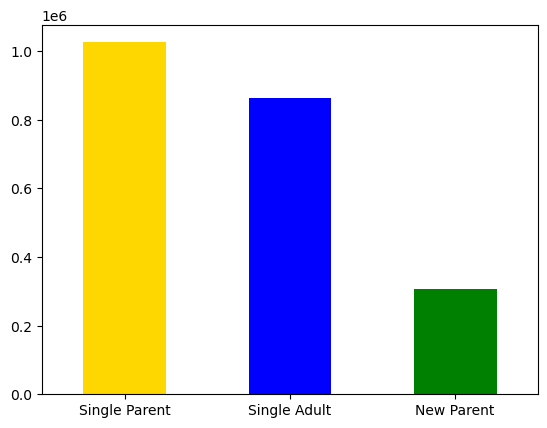

In [48]:
# create visualization showing distribution of profiles
parent_profiles_distribution = ords_merge['parent_profile'].value_counts().plot.bar(rot = 0, color = ['gold', 'blue', 'green'])

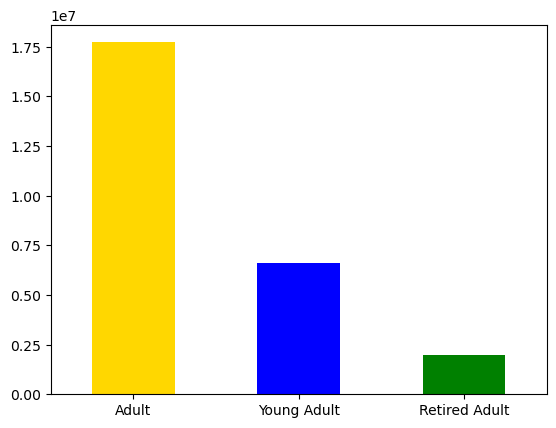

In [47]:
age_profiles_distribution = ords_merge['age_profile'].value_counts().plot.bar(rot = 0, color = ['gold', 'blue', 'green'])

### Aggregation of customer profiles

In [ ]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency
ords_merge.groupby('profile').agg({'days_since_previous_order': ['max', 'min', 'mean']})

In [ ]:
# Aggregate the max, mean, and min variables on a customer-profile level for expenditure
ords_merge.groupby('profile').agg({'prices': ['max', 'min', 'mean']})

### Regional comparisons

In [ ]:
# compare profiles w/ regions
regional_profiles = pd.crosstab(ords_merge['profile'], ords_merge['region'], dropna = False)

In [ ]:
regional_profiles

In [ ]:
reg_prof_bar = regional_profiles.plot.bar(rot = 0, color = ['blue', 'gold', 'purple', 'green'])

### Department comparisons

In [ ]:
# compare profiles w/ departments
department_profiles = pd.crosstab(ords_merge['department_id'], ords_merge['profile'], dropna = False)

In [ ]:
department_profiles

In [ ]:
dept_prof_bar = department_profiles.plot.bar(rot = 0, color = ['blue', 'gold', 'purple', 'green', 'orange'])

### Export charts

In [53]:
region_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'region_bar.png'))

In [ ]:
spend_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'spend_bar.png'))

In [ ]:
profiles_distribution.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'profiles_distribution.png'))

In [ ]:
reg_prof_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'region_profile.png'))

In [ ]:
dept_prof_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'department_profile.png'))

In [49]:
parent_profiles_distribution.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'parent_profiles.png'))

In [50]:
age_profiles_distribution.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'age_profiles.png'))

### Export data

In [ ]:
ords_merge.to_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))